# QuaSaR: Identifying EEW Rings - Waveform Analysis

[Quake Safe Rings](./1a_stations_faultlnes_plot.ipynb) - in our efforts to understand the station waveform data - we are using GeoNet provided [FDSN IRIS SeedLink API](http://ds.iris.edu/ds/nodes/dmc/services/seedlink/). The intent is to:
1. Make use of the SeedLink to get station-wise velocity and acceleration time-series data for a given window
1. Convert the time-series to tensors to be able to apply linear algebra and calculus on the datasets
1. Formulate station rings based on the class of tensors they belong to (e.g. accelerometers)

In [1]:
'''
    WARNING CONTROL to display or ignore all warnings
'''
import warnings; warnings.simplefilter('default')     #switch betweeb 'default' and 'ignore'

In [2]:
import sys
sys.path.insert(1, '/home/nuwan/workspace/quasar/lib')

import stations
import faults

''' TODO send time window '''
cls_st = stations.station_data()
__client = cls_st.get_client()
#lst_val_st, lst_inval_st = cls_st.get_stations(cls_st.get_client())
lst_val_st, lst_inval_st = cls_st.get_stations(__client)

/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Retrieving active stations with a 
start-time: 2021-02-01T11:58:23.421829Z 
 & end-time: 2021-02-08T11:58:23.421857Z
FDSN Webservice Client (base url: http://service.geonet.org.nz)
Available Services: 'dataselect' (v1.1), 'event' (v1.1), 'station' (v1.1), 'available_event_catalogs', 'available_event_contributors'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))


In [3]:
for st_idx, (st_code, st_type, st_lat, st_lon) in enumerate(lst_val_st):
    if st_code == 'KIKS':
        trace = cls_st.get_station_waveform(client=__client,station_code=st_code)

/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  version, ", ".join(READABLE_VERSIONS)))
/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/obspy/io/stationxml/core.py:98: UserWarning: The StationXML file has version 1, O

/home/nuwan/anaconda3/envs/obspy/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Component[0] with  
NZ.KIKS.20.HN1 | 2021-02-01T11:58:23.420000Z - 2021-02-03T00:00:00.140000Z | 200.0 Hz, 25939345 samples


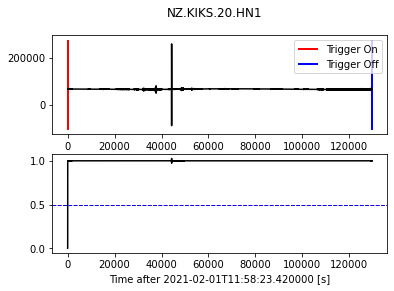

In [6]:
from obspy.signal.trigger import classic_sta_lta
from obspy.signal.trigger import plot_trigger

for idx_tr, item_tr in enumerate(trace):
    print(f'Component[{idx_tr}] with  \n{item_tr}')
    df = item_tr.stats.sampling_rate
    cft = classic_sta_lta(item_tr.data, int(5 * df), int(10 * df))
    plot_trigger(item_tr, cft, 1.5, 0.5)
    break
#    for acc in item_tr:
#        print(acc)

3 Trace(s) in Stream:
NZ.KIKS.20.HN1 | 2021-02-01T11:58:23.420000Z - 2021-02-03T00:00:00.140000Z | 200.0 Hz, 25939345 samples
NZ.KIKS.20.HN2 | 2021-02-01T11:58:23.420000Z - 2021-02-03T00:00:00.185000Z | 200.0 Hz, 25939354 samples
NZ.KIKS.20.HNZ | 2021-02-01T11:58:23.420000Z - 2021-02-03T00:00:01.355000Z | 200.0 Hz, 25939588 samples
3


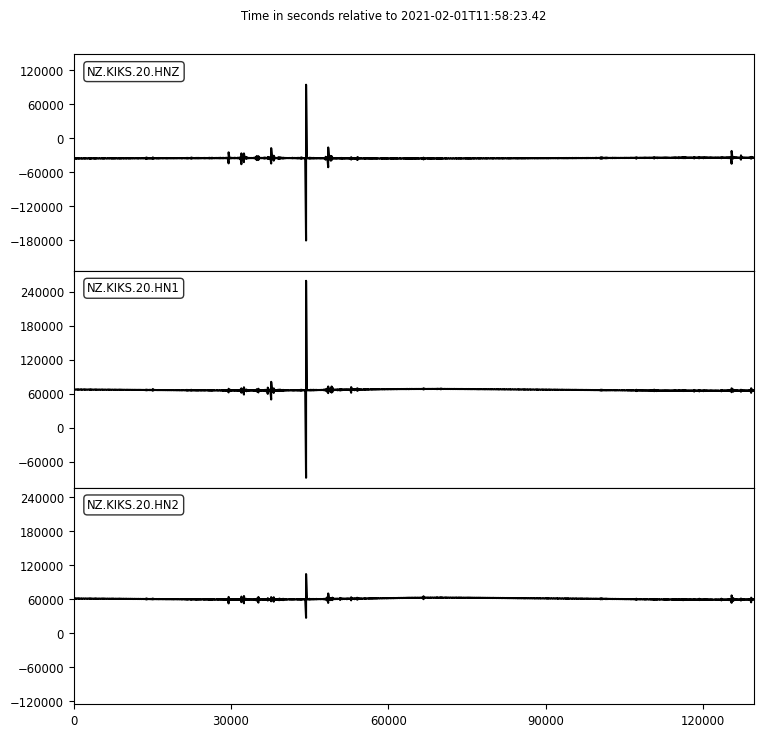

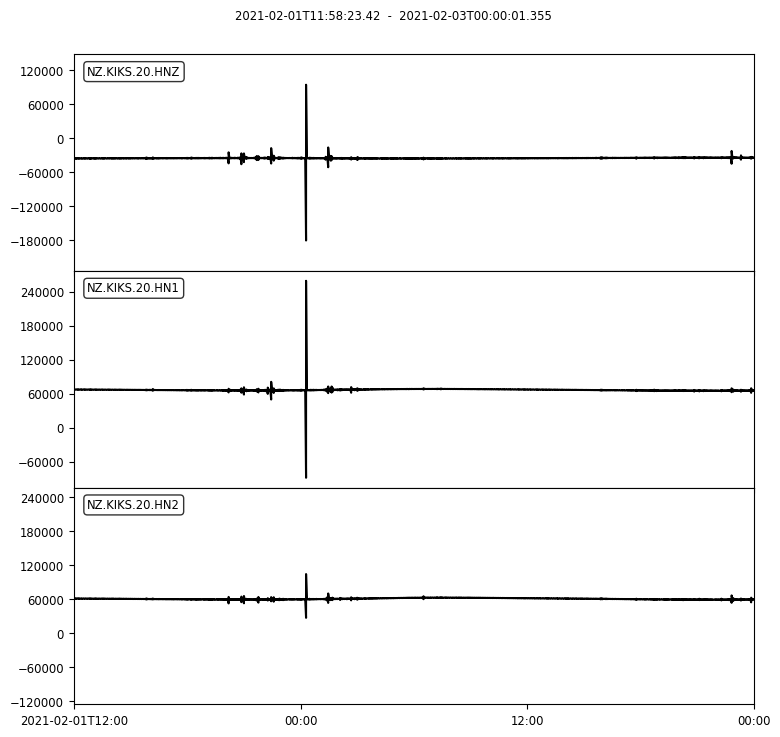

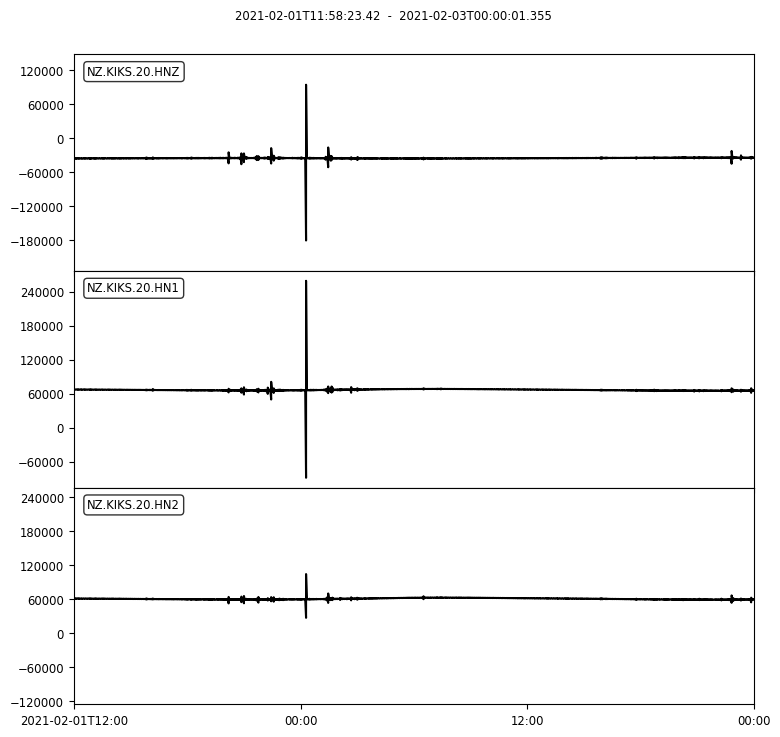

In [5]:
#from obspy.core.trace import Stats
#stats = Stats()
print(trace[0:4])
print(len(trace))
trace.plot(type="relative")
trace.plot()